<a href="https://colab.research.google.com/github/manyachawla22/makemore-char-rnn/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt


--2025-11-02 15:00:15--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2025-11-02 15:00:15 (8.74 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
with open('names.txt', 'r') as f:
    words = f.read().splitlines()

print(len(words))
print(words[:10])


32033
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


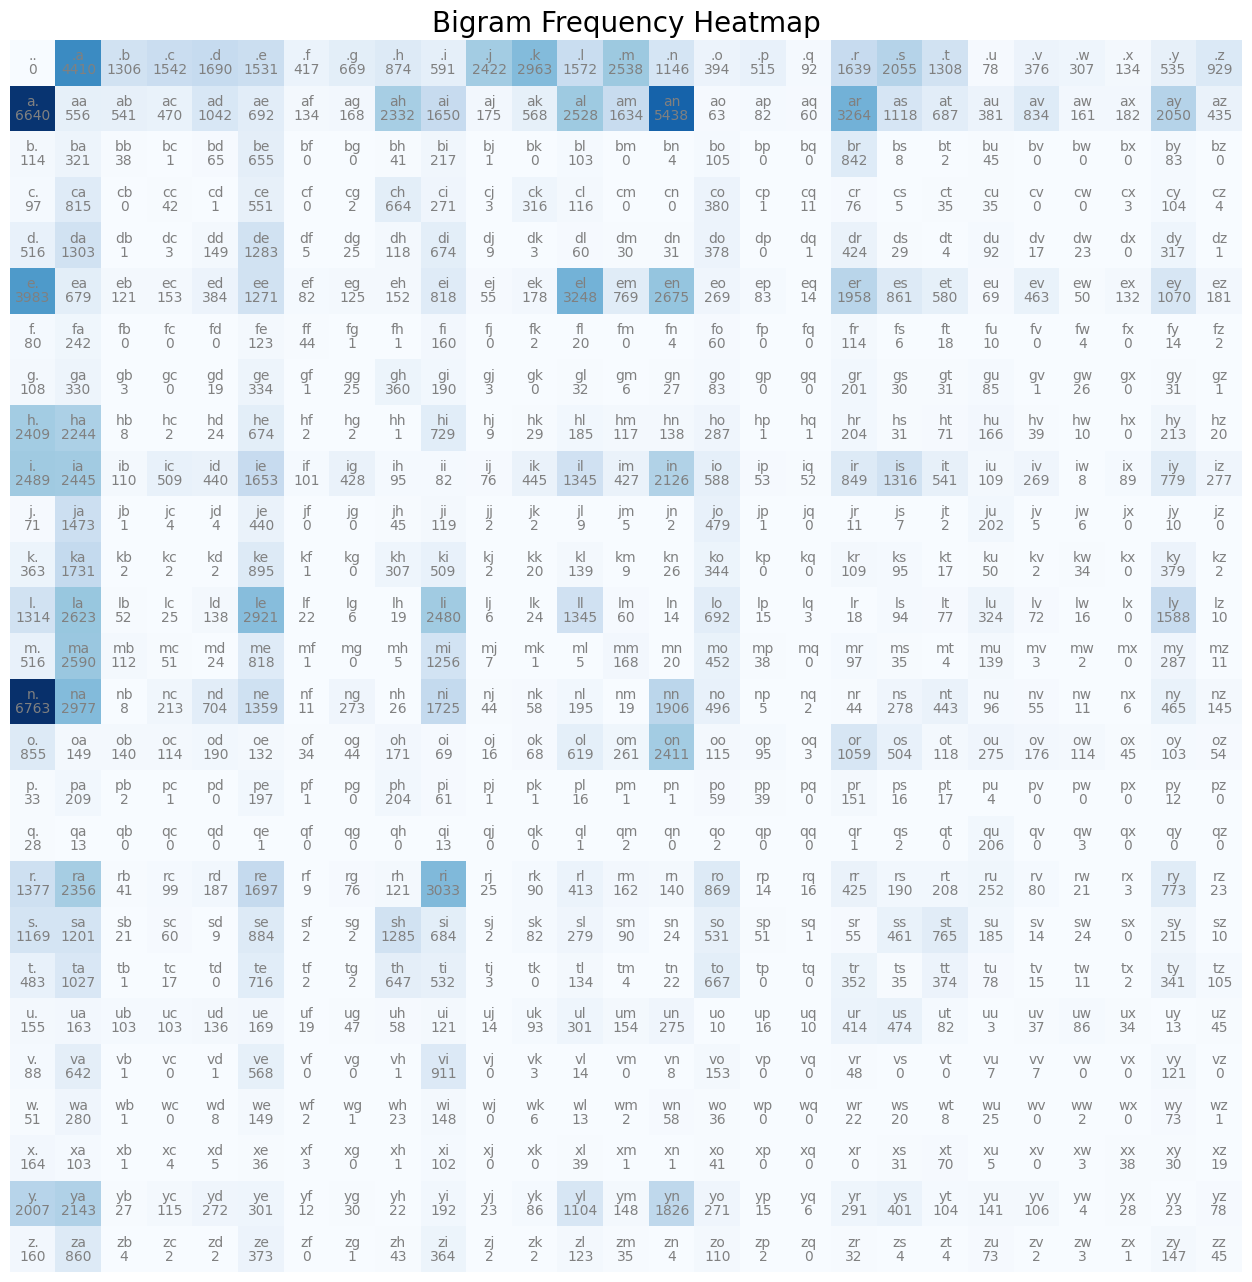

In [ ]:
import torch
import matplotlib.pyplot as plt

!wget -q https://raw.githubusercontent.com/karpathy/makemore/master/names.txt -O names.txt

words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

N = torch.zeros((len(stoi), len(stoi)), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(len(stoi)):
    for j in range(len(stoi)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis('off')
plt.title("Bigram Frequency Heatmap", fontsize=20)
plt.show()



In [ ]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f}  {logprob:.4f}')

print(f'\nTotal log likelihood: {log_likelihood}')
nll = -log_likelihood
print(f'Average negative log likelihood (NLL per bigram): {nll/n:.4f}')

Streaming output truncated to the last 5000 lines.
en: 0.1309  -2.0337
nr: 0.0025  -6.0109
ri: 0.2384  -1.4338
iq: 0.0030  -5.8126
qu: 0.6923  -0.3677
ue: 0.0538  -2.9232
e.: 0.1948  -1.6357
.l: 0.0491  -3.0146
lu: 0.0232  -3.7619
ui: 0.0386  -3.2549
is: 0.0743  -2.5998
sm: 0.0112  -4.4928
mi: 0.1885  -1.6687
ig: 0.0242  -3.7214
gu: 0.0440  -3.1233
ue: 0.0538  -2.9232
el: 0.1589  -1.8396
l.: 0.0940  -2.3641
.l: 0.0491  -3.0146
lu: 0.0232  -3.7619
uk: 0.0297  -3.5157
km: 0.0020  -6.2279
ma: 0.3885  -0.9454
an: 0.1604  -1.8302
n.: 0.3685  -0.9982
.l: 0.0491  -3.0146
lu: 0.0232  -3.7619
un: 0.0873  -2.4386
na: 0.1623  -1.8186
a.: 0.1958  -1.6305
.l: 0.0491  -3.0146
lu: 0.0232  -3.7619
uv: 0.0120  -4.4214
v.: 0.0342  -3.3746
.l: 0.0491  -3.0146
ly: 0.1136  -2.1749
yn: 0.1864  -1.6800
nt: 0.0242  -3.7218
to: 0.1193  -2.1257
on: 0.3030  -1.1941
n.: 0.3685  -0.9982
.l: 0.0491  -3.0146
ly: 0.1136  -2.1749
yo: 0.0277  -3.5846
on: 0.3030  -1.1941
ns: 0.0152  -4.1864
s.: 0.1439  -1.9389
.l: 0.049

In [ ]:
xs,ys=[],[]
for w in words[:1]:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [ ]:
import torch.nn.functional as f
xenc=f.one_hot(xs,num_classes=27).float()
xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

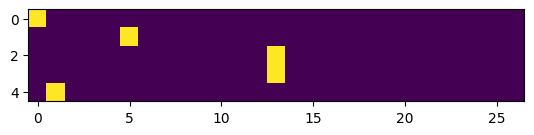

In [ ]:
plt.imshow(xenc)

In [ ]:
g=torch.Generator().manual_seed(42)
W = torch.randn((27, 27), generator=g, requires_grad=True)
 #column tells features that activate,row tells how each input feature contributes to output

#when (27,1) each row gives single scalar output value after weighing each input value with its respective contribution
#when (27,27) each row gives probability for each output value
#number of columns is number of neurons because ek neuron predict krta hai ki output konse vaala aayga
#Each of those neurons is a column of 𝑊, taking the same 27 inputs but producing its own score.
#ek neuron ke weights hein iss hisab se ki vo predict karenge ki ek letter ke scores
#Column j of W (W[:, j]) contains all the weights that determine
#how much each input character contributes to predicting output letter j.

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples: 228146


In [ ]:
for k in range(100):
  #forward pass
  xenc=f.one_hot(xs,num_classes=27).float()
  logits=xenc @ W
  counts=logits.exp()
  probs=counts/counts.sum(1,keepdims=True)
  loss=-probs[torch.arange(num),ys].log().mean()+0.01*(W**2).mean() #to make w closer to 0,hence probability even
  print(loss.item())
  #backward pass
  W.grad = None
  loss.backward()
  W.data += -50*W.grad


3.7686190605163574
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107581615448
2.509854555130005
2.5089924335479736
2.5081682205200195
2.507380485534668
